In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [91]:
boston=load_boston()

In [92]:
type(boston) #as it is of utils(dictionary) format let's understand check what it contains

sklearn.utils.Bunch

In [93]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [94]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [95]:
#before doing any data prrocessing we need to convert into dataframe

In [96]:
df=pd.DataFrame(data=boston.data,columns=boston.feature_names)

In [97]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [98]:
#Adding target variable into dataframe
df["Target"]=boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Data Preprocessing

In [99]:
df.shape

(506, 14)

In [100]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Target'],
      dtype='object')

In [101]:
df.isnull().values.any()

False

In [102]:
df.dtypes  #checking data type of each features

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
Target     float64
dtype: object

## Data Visualization

In [103]:
x=df.loc[:,df.columns!="Tareget"]
y=df.loc[:,"Target"]

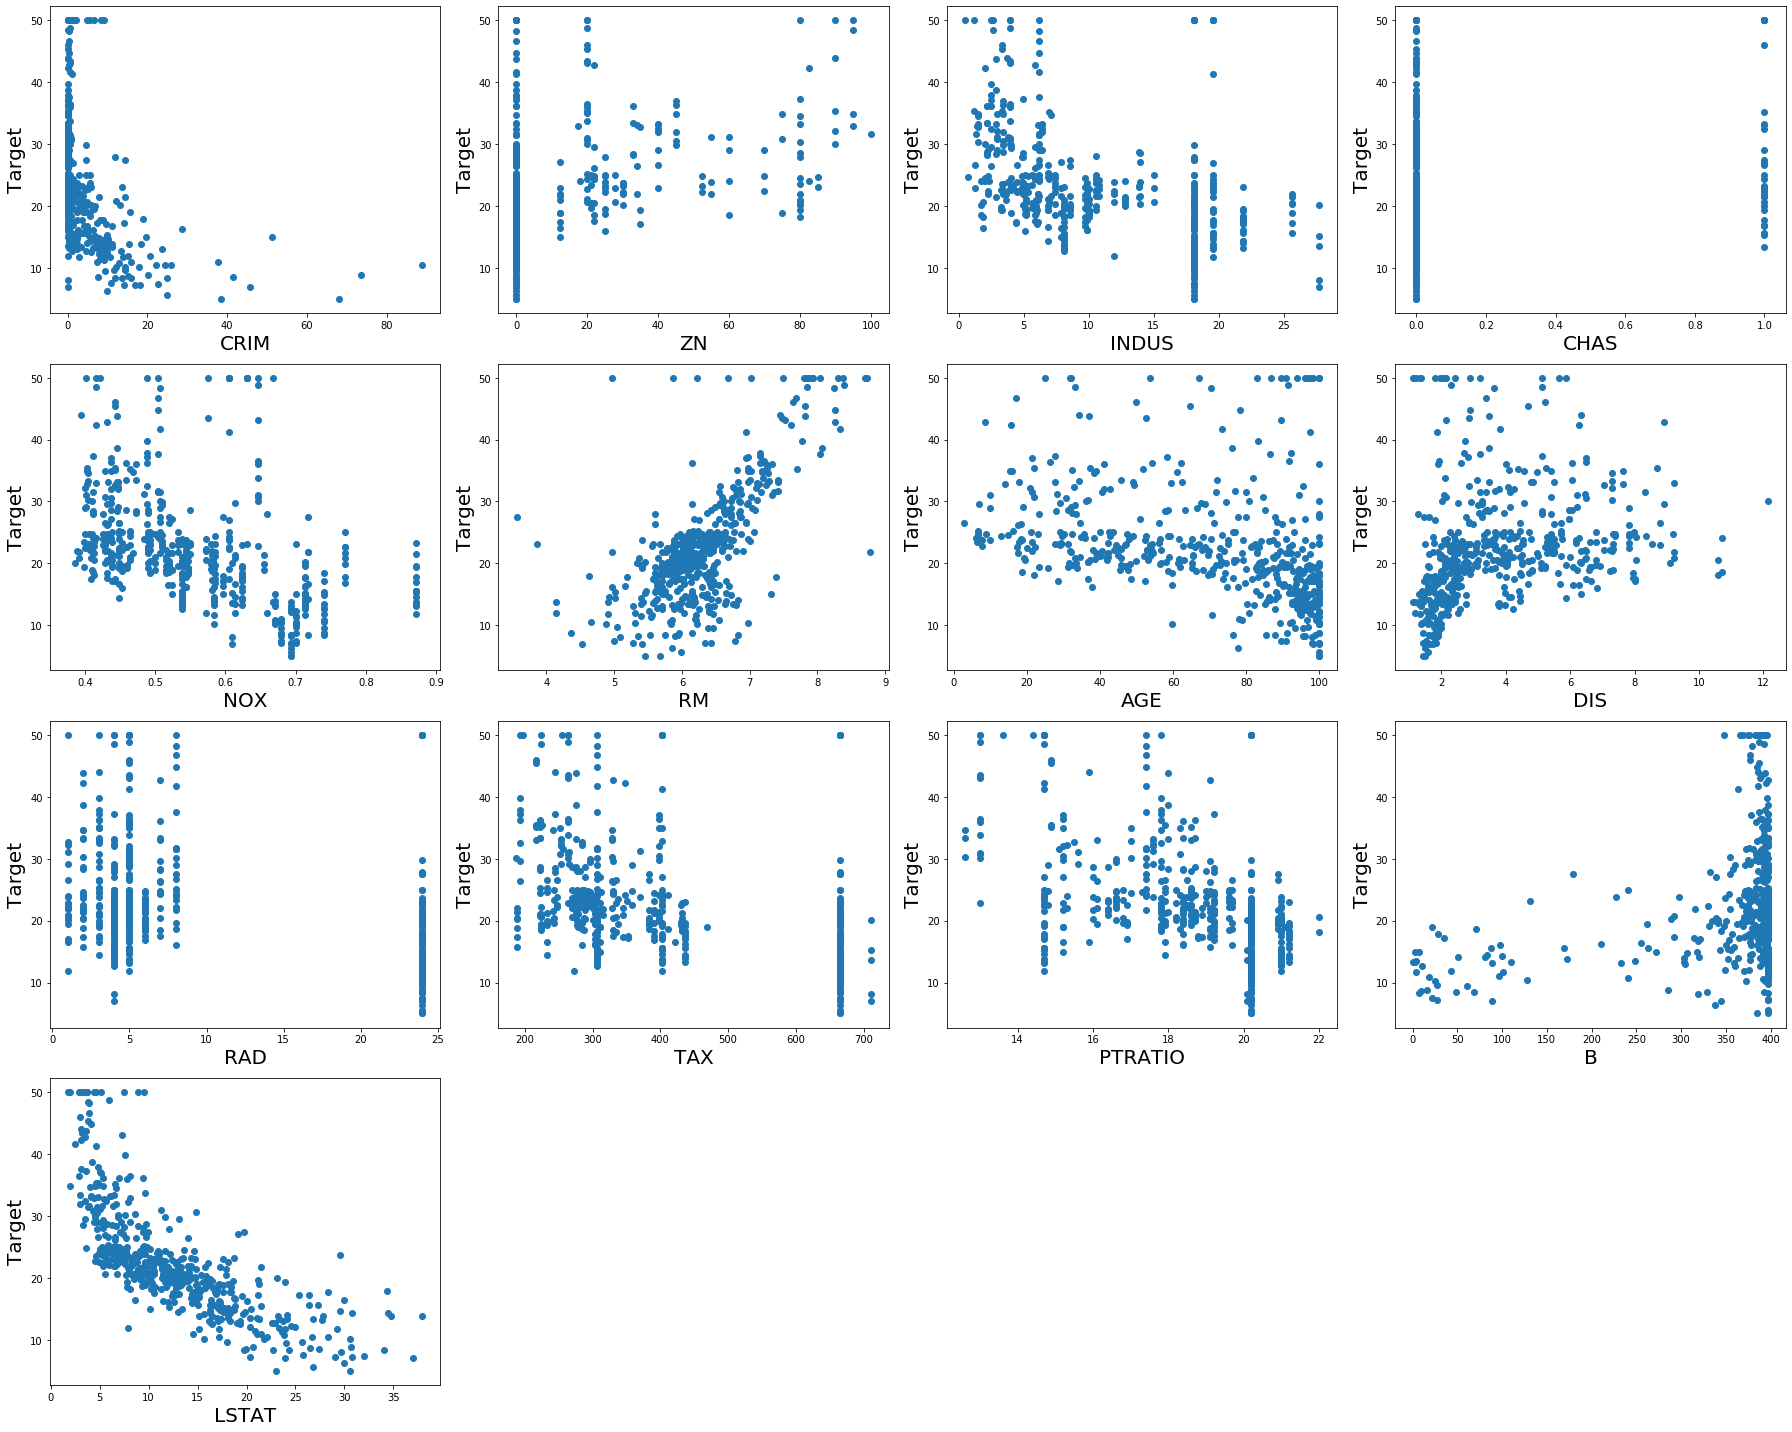

In [109]:
#checking how each features has been distributed against target variable
plt.figure(figsize=(25,20))
j=1
for i in x.columns:
    if j<=13:
        plt.subplot(4,4,j)
        plt.scatter(df[i],y)
        plt.xlabel(i,fontsize=20)
        plt.ylabel("Target",fontsize=20)
    j+=1
plt.tight_layout()

 1.As we see above figure we can understand ZN,CHAS,RADTAX has shown non linear relationship with target variable 
 2.lstat has negative effect on flat prices as we go way from origin the flat price decreases sharply
 3.RM is showing strong positive correlation as we go away from orign the value of flat prices also increases
 4.As we don't have categorical data in any of the features hence will skip feature engineering

## Feature Selection

In [110]:
#selecting features based on variance inflation factor
#vif determine how independent variable is correlated with other independent variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
vif=pd.DataFrame()
vif["Fatures"]=x.columns
vif["VIF"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif


,Fatures,VIF
0,CRIM,1.831537
1,ZN,2.352186
2,INDUS,3.992503
3,CHAS,1.095223
4,NOX,4.586920
5,RM,2.260374
6,AGE,3.100843
7,DIS,4.396007
8,RAD,7.808198
9,TAX,9.205542


In [111]:
#whichever feature has value greater than 5 will be considered as highly correlated and will remove them
df=df.drop(["TAX"],axis=1)
x=x.drop(["TAX"],axis=1)

In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
vif=pd.DataFrame()
vif["Fatures"]=x.columns
vif["VIF"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif


,Fatures,VIF
0,CRIM,1.829538
1,ZN,2.216337
2,INDUS,3.235660
3,CHAS,1.084627
4,NOX,4.578751
5,RM,2.260029
6,AGE,3.098057
7,DIS,4.392557
8,RAD,2.898743
9,PTRATIO,1.991741


Now there is no any feature which is highly coreelated with each other

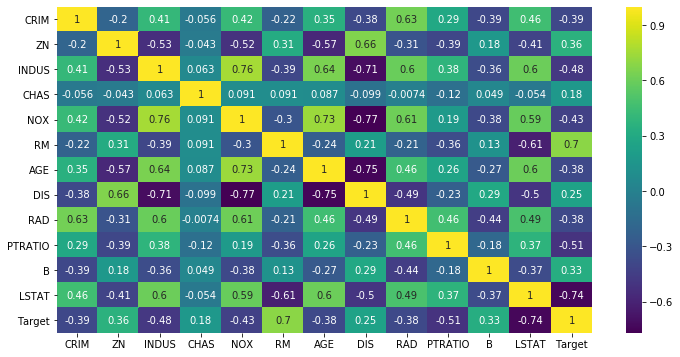

In [113]:
#by using correlation matrix we can check how independent  variable is correlated with target
plt.figure(figsize=(12,6))
corr=df.corr()
ax=sns.heatmap(corr,annot=True,annot_kws={"size":10},cmap="viridis")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [114]:
#whichever independent variable  has correlation greater than 0.5 with target will be considered as
#important variables and remaing will be dropped
def HighlyCorrelated(data,threshold):
    feature=[]
    values=[]
    for ele,index in enumerate(data.index):
        if abs(data[index])> threshold:
            feature.append(index)
            values.append(data[index])
    df=pd.DataFrame(data=values,index=feature,columns= ["Correlation"])
    return df
threshold=0.5
corr_df=HighlyCorrelated(corr.Target,threshold)
corr_df

,Correlation
RM,0.695360
PTRATIO,-0.507787
LSTAT,-0.737663
Target,1.000000


Now our all the further operation will happen based on these highly correlated features.

In [115]:
x=df[["RM","PTRATIO","LSTAT"]]
y=df.loc[:,"Target"]

In [116]:
print(x.shape)
print(y.shape)

(506, 3)
(506,)


## Modeling and Prediction

In [117]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,ra)

In [119]:
reg=LinearRegression()
reg.fit(x_train,y_train)
y_predict=reg.predict(x_test)
y_train_pred=reg.predict(x_train)

In [121]:
print(r2_score(y_train,y_train_pred))

0.6727359570369869


In [122]:
print(r2_score(y_test,y_predict))

0.6843527186775613
